# Image Segmentation
1. Line Detection
2. Isolated Point Detection
3. Canny, Sobel and Laplacian Edge Detection
4. K-Means Clustering
5. Thresholding
6. Region Growing
7. Edge Linking

### Line detection using Hough Transform
### Isolated Point Detection
### Canny, Sobel and Laplacian Edge Detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


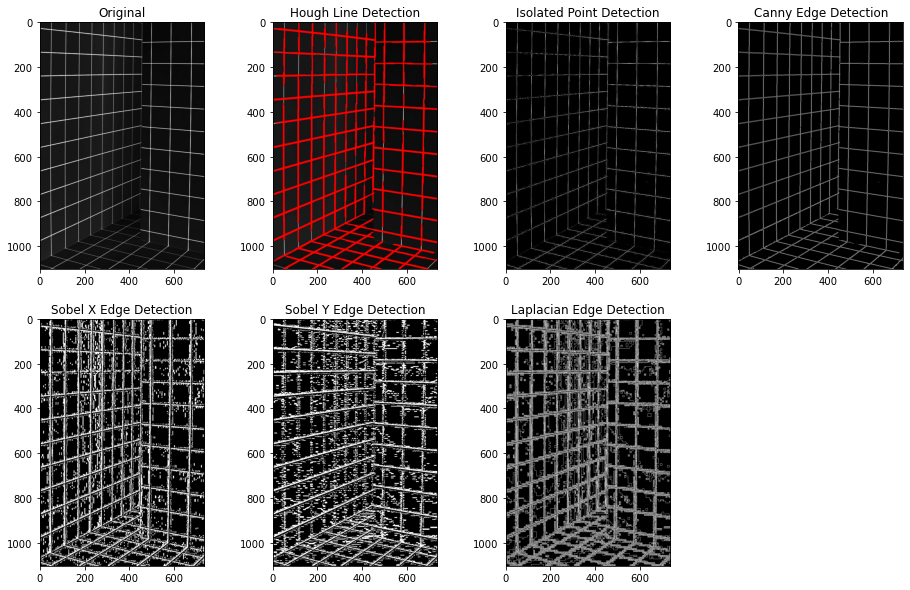

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(245)
ax6 = fig.add_subplot(246)
ax7 = fig.add_subplot(247)

image = cv2.imread("C:/Users/psvis/OneDrive/Pictures/Reddit Wallpapers/Grid.jpg")
src = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Canny Edge Detection
edges = cv2.Canny(src,50,150)

# Hough Transform for Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)

# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv2.line(src, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)

# Isolated Point Detection
point_detection = np.array([[-1,-1,-1], [-1,7,-1], [-1,-1,-1]])
filtered = cv2.filter2D(image,-1,point_detection)

original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Sobel X & Y Edge Detection
sobel_x = cv2.Sobel(original, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(original, cv2.CV_64F, 0, 1, ksize=5)

# Laplacian Edge Detection
lap_edge = cv2.Laplacian(original, cv2.CV_64F)

# Displaying Images
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

ax1.title.set_text("Original")
ax1.imshow(original)
ax2.title.set_text("Hough Line Detection")    
ax2.imshow(src)
ax3.title.set_text("Isolated Point Detection")
ax3.imshow(filtered)
ax4.title.set_text("Canny Edge Detection")
ax4.imshow(edges)
ax5.title.set_text("Sobel X Edge Detection")
ax5.imshow(sobel_x)
ax6.title.set_text("Sobel Y Edge Detection")
ax6.imshow(sobel_y)
ax7.title.set_text("Laplacian Edge Detection")
ax7.imshow(lap_edge)

plt.show()

## K-Mean Clustering

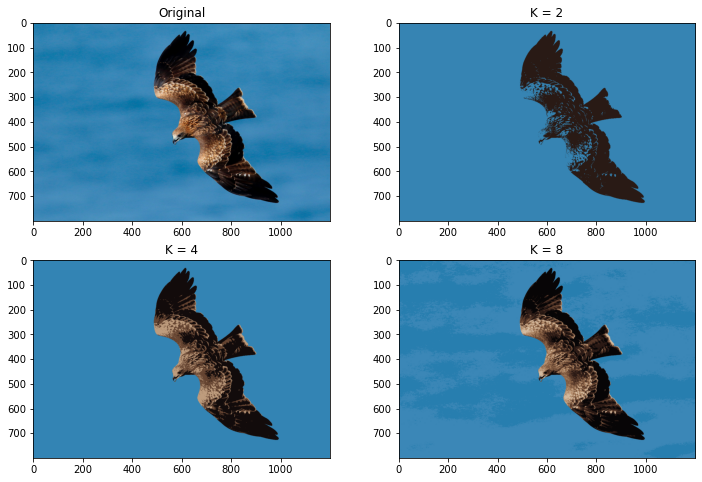

In [3]:
image = cv2.imread("C:/Users/psvis/OneDrive/Pictures/eagle.jpg")
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixel_vals = original.reshape((-1,3)) 
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

k=2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 
seg1 = segmented_data.reshape((original.shape))

k=4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 
seg2 = segmented_data.reshape((original.shape))

k=8
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
centers = np.uint8(centers) 
segmented_data = centers[labels.flatten()] 
seg3 = segmented_data.reshape((original.shape))

ax1.title.set_text("Original")
ax1.imshow(original)
ax2.title.set_text("K = 2")    
ax2.imshow(seg1)
ax3.title.set_text("K = 4")
ax3.imshow(seg2)
ax4.title.set_text("K = 8")
ax4.imshow(seg3)

plt.show()

## Thresholding

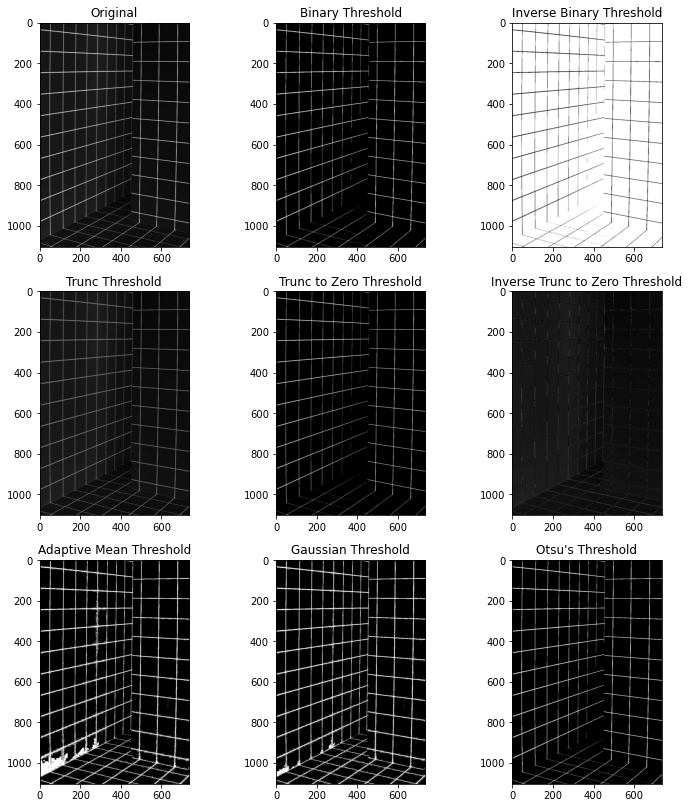

In [4]:
src = cv2.imread("C:/Users/psvis/OneDrive/Pictures/Reddit Wallpapers/Grid.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(12,14))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

# Binary Threshold
ret,thresh1 = cv2.threshold(src,127,255,cv2.THRESH_BINARY)

# Inverse Binary Threshold
ret,thresh2 = cv2.threshold(src,127,255,cv2.THRESH_BINARY_INV)

# Trunc Threshold
ret,thresh3 = cv2.threshold(src,127,255,cv2.THRESH_TRUNC)

# Trunc to Zero Threshold
ret,thresh4 = cv2.threshold(src,127,255,cv2.THRESH_TOZERO)

# Inverse Trunc to Zero Threshold
ret,thresh5 = cv2.threshold(src,127,255,cv2.THRESH_TOZERO_INV)

# Adaptive Mean Threshold
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
block_size = 513
constant = 2
thresh6 = cv2.adaptiveThreshold(src_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)

# Gaussian Threshold
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
thresh7 = cv2.adaptiveThreshold(src_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)

# Otsu's Threshold
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, thresh8 = cv2.threshold(src_gray, 0, 255, cv2.THRESH_OTSU)

ax1.title.set_text("Original")
ax1.imshow(src)
ax2.title.set_text("Binary Threshold")    
ax2.imshow(thresh1)
ax3.title.set_text("Inverse Binary Threshold")
ax3.imshow(thresh2)
ax4.title.set_text("Trunc Threshold")
ax4.imshow(thresh3)
ax5.title.set_text("Trunc to Zero Threshold")
ax5.imshow(thresh4)
ax6.title.set_text("Inverse Trunc to Zero Threshold")
ax6.imshow(thresh5)
ax7.title.set_text("Adaptive Mean Threshold")
ax7.imshow(thresh6, cmap = 'gray')
ax8.title.set_text("Gaussian Threshold")
ax8.imshow(thresh7, cmap = 'gray')
ax9.title.set_text("Otsu's Threshold")
ax9.imshow(thresh8, cmap = 'gray')


plt.show()

## Region Growing

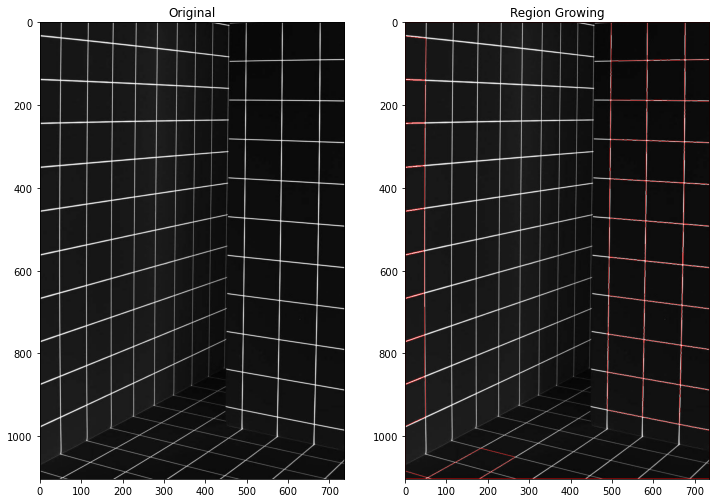

In [5]:
src = cv2.imread("C:/Users/psvis/OneDrive/Pictures/Reddit Wallpapers/Grid.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ax1.title.set_text("Original")
ax1.imshow(src)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(src,markers)
src[markers == -1] = [255,0,0]

ax2.title.set_text("Region Growing")    
ax2.imshow(src)

plt.show()

## Edge Linking

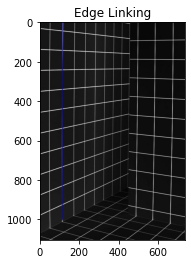

In [9]:
src = cv2.imread("C:/Users/psvis/OneDrive/Pictures/Reddit Wallpapers/Grid.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(src,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.imshow(src)
plt.title("Edge Linking")
plt.show()
